In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
#declare column types
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy import desc
# PyMySQL 
import pymysql
pymysql.install_as_MySQLdb()
# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Step 1 - Climate Analysis and Exploration

In [11]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Total dates
session.query(func.count(measurement.date)).all()

[(19550)]

In [14]:
# Earliest Date
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01')

In [15]:
# Latest Date
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prcp_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23').all()

In [17]:
prcp_df = pd.DataFrame(prcp_data, columns=['date', 'prcp'])
prcp_df.set_index('date', inplace=True, )
prcp_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [18]:
prcp_df = prcp_df.sort_index()

In [19]:
prcp_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


<IPython.core.display.Javascript object>


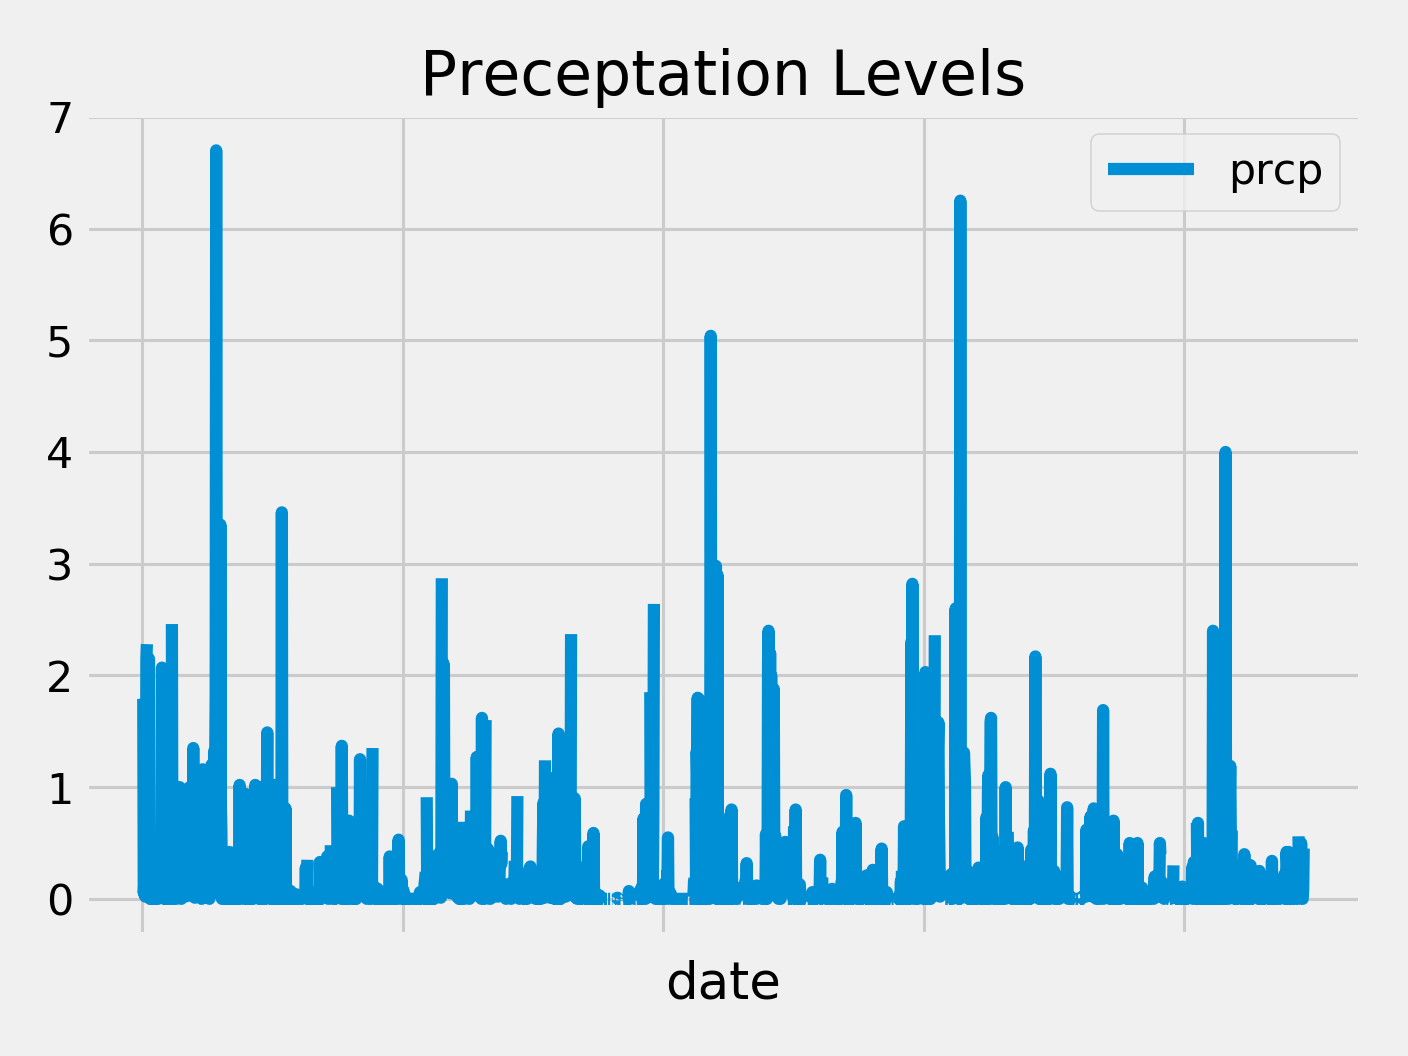

In [20]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
prcp_df.plot(x_compat=True, title="Preceptation Levels")
plt.tight_layout()
plt.show()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# How many stations are available in this dataset?
session.query(func.count(station.id)).all()

[(9)]

In [23]:
#station_data = pd.read_sql("SELECT * FROM station", conn)
#station_data

In [24]:
# What are the most active stations?
# List the stations and the counts in descending order.
value_count = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).all()
value_count

#.query as SELECT

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [26]:
#Low Temp
min_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281')
min_temp_df = pd.DataFrame(min_temp[:1], columns=['tobs'])
min_temp_df

,tobs
0,54.0


In [27]:
#High Temp
max_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281')
max_temp_df = pd.DataFrame(max_temp[:1], columns=['tobs'])
max_temp_df

,tobs
0,85.0


In [28]:
#Avg Temp
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281')
avg_temp_df = pd.DataFrame(avg_temp[:1], columns=['tobs'])
avg_temp_df

,tobs
0,71.663781


In [30]:
session.query(measurement.tobs).\
    filter(measurement.date >= '2016-08-23').all()

[(81.0),
 (79.0),
 (80.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (79.0),
 (80.0),
 (81.0),
 (80.0),
 (79.0),
 (75.0),
 (79.0),
 (76.0),
 (76.0),
 (80.0),
 (79.0),
 (78.0),
 (76.0),
 (78.0),
 (78.0),
 (75.0),
 (79.0),
 (80.0),
 (79.0),
 (81.0),
 (77.0),
 (77.0),
 (78.0),
 (76.0),
 (82.0),
 (81.0),
 (78.0),
 (80.0),
 (80.0),
 (79.0),
 (80.0),
 (80.0),
 (80.0),
 (79.0),
 (79.0),
 (79.0),
 (80.0),
 (80.0),
 (79.0),
 (78.0),
 (76.0),
 (75.0),
 (80.0),
 (80.0),
 (79.0),
 (80.0),
 (79.0),
 (78.0),
 (78.0),
 (80.0),
 (81.0),
 (79.0),
 (77.0),
 (79.0),
 (78.0),
 (77.0),
 (77.0),
 (78.0),
 (77.0),
 (78.0),
 (77.0),
 (76.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (76.0),
 (75.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (72.0),
 (71.0),
 (72.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (75.0),
 (76.0),
 (76.0),
 (75.0),
 (72.0),
 (74.0),
 (75.0),
 (73.0),
 (76.0),
 (75.0),
 (68.0),
 (75.0),
 (75.0),
 (72.0),
 (69.0),
 (71.0),
 (68.0),
 (67.0),
 (69.0),
 (73.0),
 (70.0),
 (70.0),
 (70.0),
 

In [31]:
#tobs_data = session.query(measurement.date, measurement.tobs, measurement.station).filter(measurement.date > '2016-08-23')
#filter(measurement.station == 'USC00519281')

tobs_data = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= '2016-08-23').all()
tobs_data

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [32]:
tobs_df = pd.DataFrame(tobs_data, columns=['tobs'])
tobs_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


<IPython.core.display.Javascript object>


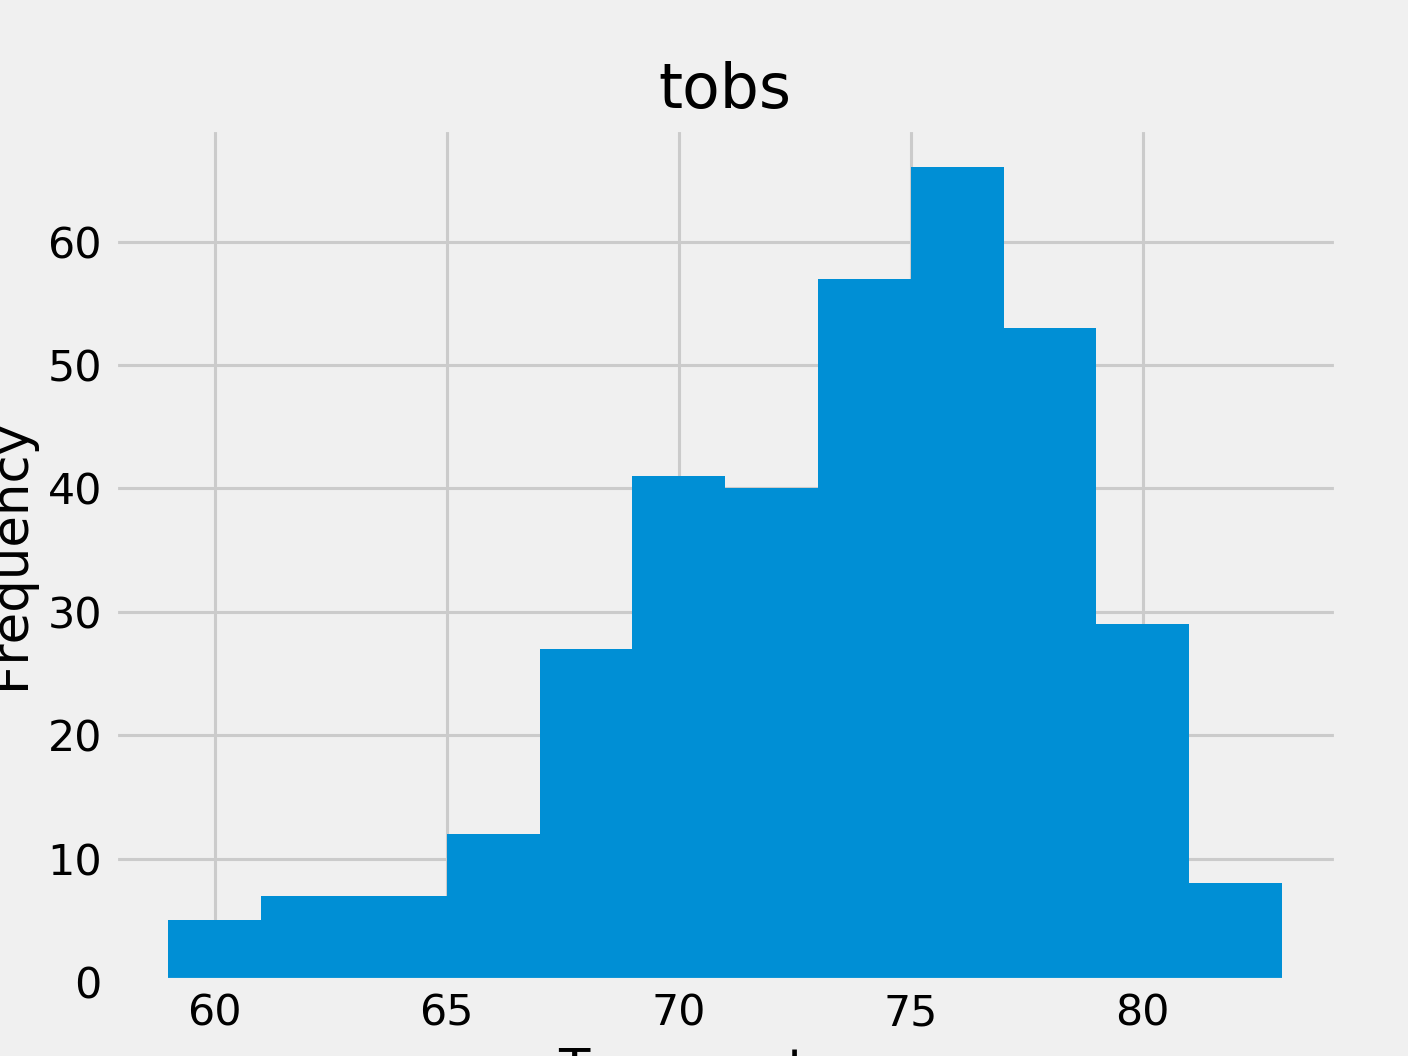

Text(0.5,0,'Temperature')

In [33]:
hist = tobs_df.hist(bins=12)

plt.ylabel("Frequency")
plt.xlabel("Temperature")

## Step 2 - Climate App

In [ ]:
#See the app.py file in the GitHub submission